In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#print options to data exploration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [ ]:
# run if using google colab 
from google.colab import drive
drive.mount('/content/drive')

In [2]:
#everyone can set their own while working. Personally I leave this blank because relative works for me
personal_path = ''

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib notebook 

imported_df = pd.read_csv(personal_path + 'Data/full_imputed_smoothed_per_million.csv')

# Get the names of our variables of interest 
X_cols = ['Beta', 'Epsilon', 'Gamma', 'Kappa', 'Iota',
       'Eta', 'Delta', 'Alpha', 'non_who', 'Lambda', 'Mu', 
       'total_vaccinations_per_hundred', 'gdp_per_capita', 
       'aged_70_older', 'life_expectancy']
y_cases_col = ['new_cases_smoothed_per_million']
y_deaths_col = ['new_deaths_smoothed_per_million']

# Create data frames with only the variables of interest
X_df = imported_df[X_cols]
y_cases_df = imported_df[y_cases_col]
y_deaths_df = imported_df[y_deaths_col]

<IPython.core.display.Javascript object>


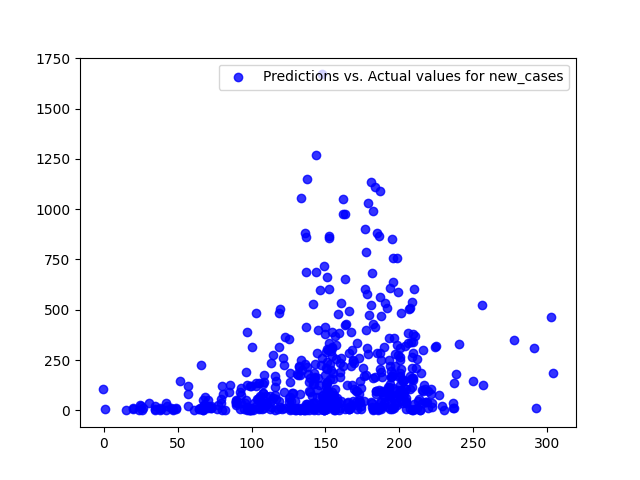

0.04526162219000285


In [4]:
#model via sklearn
# ------------- NEW_CASES MODEL------------- 
# Train test split for cases model
X_cases_train, X_cases_test, y_cases_train, y_cases_test = train_test_split(X_df, y_cases_df)

# Create and train linear regression
lr = LinearRegression()
lr.fit(X_cases_train, y_cases_train)

# Use linear regression to predict on test data
prediction = lr.predict(X_cases_test)

# Plot predictions against actual values
# plt.plot(X_cases_test, prediction, label='Predictions for new_cases', color='r', alpha=0.8)
plt.scatter(prediction, y_cases_test, label='Predictions vs. Actual values for new_cases', color='b', alpha=0.8)
plt.legend()
plt.show()

# Get score for the model
print(lr.score(X_cases_test, y_cases_test))
# ------------- END NEW_CASES MODEL -------------

In [5]:
#model via statsmodels
import statsmodels.api as sm
X_cases = X_df.drop(['non_who'], axis=1)
y_cases = y_cases_df
X2 = sm.add_constant(X_cases)
est = sm.OLS(y_cases, X2)
est2 = est.fit()
print(est2.summary())

                                  OLS Regression Results                                  
Dep. Variable:     new_cases_smoothed_per_million   R-squared:                       0.064
Model:                                        OLS   Adj. R-squared:                  0.058
Method:                             Least Squares   F-statistic:                     10.73
Date:                            Wed, 08 Dec 2021   Prob (F-statistic):           5.15e-24
Time:                                    12:15:14   Log-Likelihood:                -14876.
No. Observations:                            2211   AIC:                         2.978e+04
Df Residuals:                                2196   BIC:                         2.987e+04
Df Model:                                      14                                         
Covariance Type:                        nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025    